In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\MANEE\\Documents\\Machine learning\\Cluster_Unsupervised'

In [2]:
data_df = pd.read_csv('bank.csv')
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [3]:
data_df.shape

(515, 6)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [5]:
data_df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


In [6]:
data_df.duplicated().sum()

0

# Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
x = StandardScaler()
scaled_x = pd.DataFrame(x.fit_transform(data_df.iloc[:,1:6]), columns=data_df.columns[1:])

In [9]:
scaled_x

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [10]:
scaled_x.describe()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02
mean,-1.345202e-16,-2.218290e-16,4.440892e-17,4.083034e-16,7.415859e-17
std,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00
min,-1.685875e+00,-2.475141e+00,-1.704195e+00,-3.972785e+00,-2.620936e+00
25%,-9.424540e-01,-8.390411e-01,-8.291248e-01,-5.947025e-01,-7.326008e-01
50%,7.130193e-02,2.298977e-02,-5.906299e-02,5.801163e-02,2.872807e-02
75%,8.823066e-01,8.674282e-01,8.160073e-01,8.366882e-01,7.061309e-01
max,1.768404e+00,1.694274e+00,4.561308e+00,1.638267e+00,2.870223e+00


# Creating Clusters using KMeans

In [11]:
# rule 1 - create k means cluster and store the result in the object k_means
# randomely n_cluster =2
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=1)
k_means.fit(scaled_x)

KMeans(n_clusters=2, random_state=1)

In [12]:
k_means.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [13]:
# within cluster sum of square
k_means.inertia_

1943.3740862056477

In [14]:
k_means = KMeans(n_clusters=1, random_state=1)
k_means.fit(scaled_x)
k_means.inertia_

2575.0000000000005

In [15]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(scaled_x)
k_means.inertia_

1593.970857719221

In [16]:
k_means = KMeans(n_clusters=4, random_state=1)
k_means.fit(scaled_x)
k_means.inertia_

1375.4932875022525

In [17]:
k_means = KMeans(n_clusters=5, random_state=1)
k_means.fit(scaled_x)
k_means.inertia_

1220.2742967592992

In [18]:
# Calculate WSS for other values of K - Elbow method
# Elbor method will decide how many cluster is required

In [19]:
wss = []

for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(scaled_x)
    wss.append(KM.inertia_)

In [20]:
wss

[2575.0000000000005,
 1943.3740862056477,
 1593.970857719221,
 1375.4932875022525,
 1220.2742967592992,
 1115.743872395149,
 1024.2940640357656,
 945.039078113271,
 886.3657321414202,
 832.7774003606155]

In [21]:
a = [1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

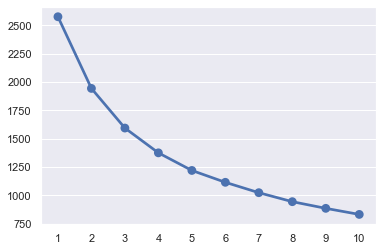

In [22]:
sns.pointplot(a, wss)

# KMeans with K=3 or K=5

In [23]:
k_means = KMeans(n_clusters=5, random_state=1)
k_means.fit(scaled_x)
labels = k_means.labels_
labels

array([4, 3, 1, 4, 4, 2, 3, 2, 1, 1, 2, 2, 1, 4, 0, 0, 2, 3, 2, 0, 3, 3,
       2, 1, 3, 0, 4, 3, 4, 1, 1, 4, 4, 4, 0, 4, 2, 4, 1, 2, 3, 1, 0, 2,
       2, 4, 1, 0, 2, 4, 3, 1, 4, 1, 3, 1, 2, 0, 4, 0, 0, 0, 0, 4, 2, 3,
       4, 2, 3, 1, 2, 2, 3, 2, 0, 0, 0, 3, 4, 1, 1, 2, 0, 3, 0, 4, 1, 4,
       3, 0, 0, 4, 1, 4, 4, 2, 2, 1, 3, 4, 4, 2, 0, 2, 1, 4, 4, 2, 1, 0,
       4, 3, 0, 0, 2, 2, 0, 0, 0, 4, 0, 2, 4, 4, 4, 3, 0, 2, 0, 0, 3, 0,
       0, 1, 1, 4, 3, 2, 1, 2, 4, 2, 0, 1, 1, 3, 1, 0, 1, 4, 3, 1, 1, 4,
       2, 2, 0, 3, 2, 4, 2, 1, 4, 1, 1, 0, 3, 3, 1, 0, 3, 0, 0, 2, 2, 1,
       3, 4, 1, 3, 3, 2, 2, 2, 4, 0, 1, 3, 0, 3, 4, 2, 2, 3, 2, 2, 3, 2,
       4, 0, 3, 0, 0, 3, 1, 0, 2, 4, 4, 0, 0, 0, 0, 3, 0, 0, 4, 2, 0, 1,
       1, 3, 0, 0, 1, 3, 4, 2, 1, 2, 4, 2, 4, 0, 3, 4, 4, 4, 4, 0, 1, 2,
       1, 0, 2, 0, 4, 3, 4, 2, 2, 2, 2, 1, 0, 0, 3, 0, 4, 2, 1, 4, 0, 2,
       2, 0, 3, 3, 1, 1, 0, 0, 4, 4, 2, 4, 2, 1, 1, 2, 4, 4, 4, 1, 4, 1,
       4, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 2, 4, 1, 1,

In [24]:
# cluster evaluation for 5 cluster : the silhouette score

from sklearn.metrics import silhouette_samples, silhouette_score

In [25]:
silhouette_score(scaled_x, labels, random_state=1)

0.2300408199578604

In [26]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(scaled_x)
labels = k_means.labels_
labels

array([2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2,

In [27]:
silhouette_score(scaled_x, labels, random_state=1)

0.218819843712231

In [28]:
data_df['cluster_kmeans_5'] = labels
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster_kmeans_5
0,1,227,147,111,2460,639,2
1,2,123,86,65,3510,436,1
2,3,306,149,76,2570,669,2
3,4,251,112,129,3650,623,0
4,5,174,135,128,3400,579,1


In [29]:
data_df['cluster_kmeans_5'].value_counts().sort_index()

0    154
1    178
2    183
Name: cluster_kmeans_5, dtype: int64

In [30]:
clust_profile = data_df.drop(['Bank'], axis=1)
clust_profile = clust_profile.groupby('cluster_kmeans_5').mean()
clust_profile['frequency'] = data_df['cluster_kmeans_5'].value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,frequency
cluster_kmeans_5,,,,,,
0,286.032468,103.038961,75.564935,3115.389610,596.428571,154
1,159.730337,144.213483,80.921348,3013.960674,520.825843,178
2,257.535519,197.098361,87.584699,2705.464481,676.087432,183


In [31]:
clust_profile.to_csv('bank_cluster_details.csv')

In [32]:
data_df.to_csv('final_datapoint.csv')

# Mall Customer Dataset

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\MANEE\\Documents\\Machine learning\\Cluster_Unsupervised'

In [34]:
mydata = pd.read_csv('Mall_Customers.csv')
mydata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
x = mydata.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [36]:
from sklearn.cluster import KMeans

In [37]:
mydata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
dtype: int64

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [40]:
y_kmeans

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [41]:
combind = pd.concat([mydata, pd.DataFrame(y_kmeans)], axis=1)
combind

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


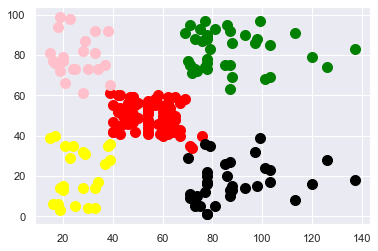

In [42]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c ='red', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c ='yellow', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c ='black', label='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c ='pink', label='Cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c ='green', label='Cluster5')